# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,393,86,47,75,165,68,6,154,43,19,146,176,356,190,74,7,3,188,194
1,10,86,36,70,143,61,9,133,50,18,130,153,266,127,66,2,10,194,202
2,422,90,34,66,158,59,7,140,47,18,124,165,298,117,61,1,3,201,207
3,754,91,41,64,148,61,8,129,51,18,142,161,249,153,68,6,12,194,201
4,128,97,45,88,173,67,10,157,43,20,157,173,365,157,67,8,12,192,200
5,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
6,455,81,43,68,139,62,7,149,46,19,145,172,323,171,83,1,14,180,184
7,723,105,46,100,195,61,9,193,34,22,150,207,557,161,65,5,9,194,202
8,442,91,36,60,126,56,6,119,56,17,130,139,211,118,67,6,14,192,198
9,406,80,38,64,130,59,8,134,51,18,126,152,259,135,76,1,23,179,188


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.242259,93.375228,44.661202,81.785064,168.007286,61.668488,8.632058,167.710383,41.196721,20.497268,147.579235,187.395264,433.462659,173.302368,72.448087,6.320583,12.324226,188.839709,195.548270
std,246.951947,8.325572,6.109850,15.702796,33.467109,8.050441,4.716734,32.585736,7.701402,2.540635,14.366412,30.575777,172.843599,32.385334,7.582848,5.050760,8.891508,6.234454,7.584797
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,205.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,5.000000,184.000000,189.000000
50%,418.000000,92.000000,44.000000,79.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,358.000000,173.000000,71.000000,5.000000,11.000000,188.000000,197.000000
75%,645.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,215.000000,574.000000,197.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,322.000000,133.000000,52.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# избавляемся от потенциальных выбросов
inliers = IsolationForest().fit_predict(X_train) == 1
X_train, y_train = X_train[inliers], y_train[inliers]

# скалируем выборку
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(ms

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

model = LogisticRegression(random_state=42)
params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 1, num=10)
}
grid = GridSearchCV(estimator=model, param_grid=params, scoring='precision_macro', cv=StratifiedKFold(n_splits=5))
grid.fit(X_train, y_train)
grid_res = pd.DataFrame(grid.cv_results_)

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/ho

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016871,0.027605,0.001996,0.000849,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.069307,0.068182,0.068182,...,0.068826,0.000573,20,0.068702,0.068987,0.068987,0.068813,0.068640,0.068826,0.000143
1,0.005664,0.000185,0.001277,0.000190,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.585593,0.694417,0.537500,...,0.608142,0.053287,19,0.674890,0.645270,0.666981,0.656712,0.692603,0.667291,0.016096
2,0.018742,0.004036,0.002040,0.000503,0.12,l1,"{'C': 0.12, 'penalty': 'l1'}",0.702599,0.706394,0.672720,...,0.687185,0.021459,18,0.748465,0.733303,0.726658,0.727214,0.757958,0.738720,0.012428
3,0.008325,0.000662,0.001337,0.000127,0.12,l2,"{'C': 0.12, 'penalty': 'l2'}",0.674922,0.725053,0.707715,...,0.713722,0.024538,16,0.769957,0.754981,0.754887,0.743310,0.763368,0.757301,0.008988
4,0.029235,0.005472,0.001652,0.000204,0.23,l1,"{'C': 0.23, 'penalty': 'l1'}",0.674577,0.714916,0.714266,...,0.705556,0.021583,17,0.775123,0.773766,0.747503,0.769844,0.759243,0.765096,0.010412


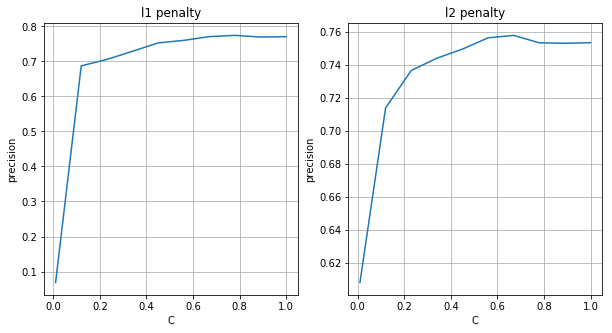

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, penalty in zip(axs, ['l1', 'l2']):
    p_res = grid_res[grid_res['param_penalty'] == penalty]

    ax.plot(p_res['param_C'], p_res['mean_test_score'])
    ax.set_ylabel('precision')
    ax.set_xlabel('C')
    ax.set_title('{} penalty'.format(penalty))
    ax.grid()

fig.show()

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


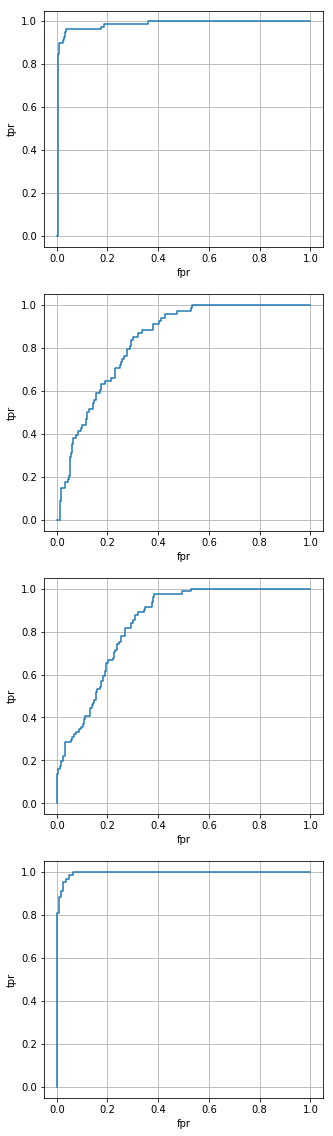

In [9]:
from sklearn.metrics import roc_curve, precision_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.transform(y_test)

n_classes = y_train_lb.shape[1]
model = OneVsRestClassifier(LogisticRegression(penalty='l1', C=1.0, random_state=42))
y_score_lb = model.fit(X_train, y_train_lb).decision_function(X_test)

fig, axs = plt.subplots(n_classes, figsize=(5,5*n_classes))
for ax, test, score in zip(axs, y_test_lb.T, y_score_lb.T):
    fpr, tpr, _ = roc_curve(test, score)
    ax.plot(fpr, tpr)
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.grid()

fig.show()

In [10]:
y_pred_lb = model.predict(X_test)
print('precision = {}, f1 = {}'.format(precision_score(y_test_lb, y_pred_lb, average='macro'), 
                                       f1_score(y_test_lb, y_pred_lb, average='macro')))

precision = 0.7510430639391906, f1 = 0.7074496298696813


#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

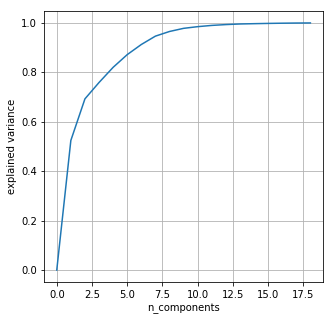

In [11]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42).fit(X_train)
var = pca.explained_variance_ratio_

fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax.plot([sum(var[:i]) for i in range(len(var))])
ax.set_ylabel('explained variance')
ax.set_xlabel('n_components')
ax.grid()

fig.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [12]:
n_components = 13
pca = PCA(n_components=n_components, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [13]:
model = LogisticRegression(random_state=42)
params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 1, num=10)
}
grid = GridSearchCV(estimator=model, param_grid=params, scoring='precision_macro', cv=StratifiedKFold(n_splits=5))
grid.fit(X_train, y_train)
grid_res = pd.DataFrame(grid.cv_results_)

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/binpord/miniconda3/envs/

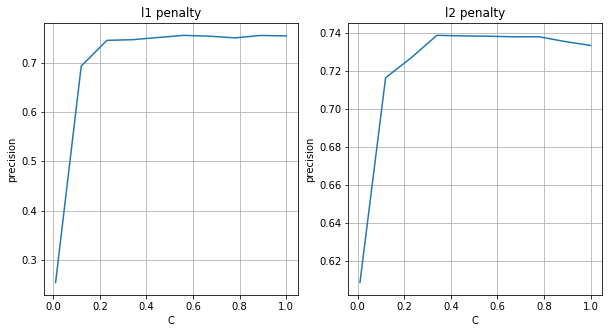

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, penalty in zip(axs, ['l1', 'l2']):
    p_res = grid_res[grid_res['param_penalty'] == penalty]

    ax.plot(p_res['param_C'], p_res['mean_test_score'])
    ax.set_ylabel('precision')
    ax.set_xlabel('C')
    ax.set_title('{} penalty'.format(penalty))
    ax.grid()

fig.show()

/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/binpord/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


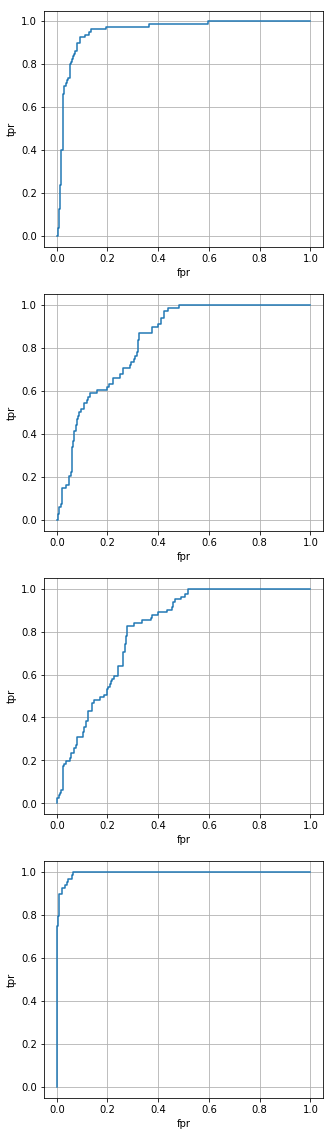

In [15]:
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.transform(y_test)

n_classes = y_train_lb.shape[1]
model = OneVsRestClassifier(LogisticRegression(**grid.best_params_, random_state=42))
y_score_lb = model.fit(X_train, y_train_lb).decision_function(X_test)

fig, axs = plt.subplots(n_classes, figsize=(5,5*n_classes))
for ax, test, score in zip(axs, y_test_lb.T, y_score_lb.T):
    fpr, tpr, _ = roc_curve(test, score)
    ax.plot(fpr, tpr)
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.grid()

fig.show()

In [16]:
y_pred_lb = model.predict(X_test)
print('precision = {}, f1 = {}'.format(precision_score(y_test_lb, y_pred_lb, average='macro'), 
                                       f1_score(y_test_lb, y_pred_lb, average='macro')))

precision = 0.7377662590820486, f1 = 0.6857266560765254


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
# YOUR CODE HERE

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.